In [1]:
## Importing necessary packages ##

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

In [2]:
def otsu_threshold(img_path):
    
    img_arr = np.array(Image.open(img_path).convert('L'))
    out_arr = np.zeros((img_arr.shape[0] , img_arr.shape[1]))
    img_resolution = img_arr.shape[0] * img_arr.shape[1] 
    pixel_arr = np.array(list(range(256)))
    img_hist = np.zeros(256)
    
    for val in img_arr:
        img_hist[val] = img_hist[val] + 1
        
    weighted_img_hist = img_hist / np.sum(img_hist)
    
    background_weight = np.zeros(256)
    foreground_weight = np.zeros(256)
    
    background_mean = np.zeros(256)
    foreground_mean = np.zeros(256)
    
    background_variance = np.zeros(256)
    foreground_variance = np.zeros(256)
    
    intra_variance = np.zeros(256)
    
    for i in range(len(weighted_img_hist)):
        
        if i == 0:
            background_weight[i] = 0
            background_mean[i] = 0
            background_variance[i] = 0
            
        else:
            background_weight[i] = np.sum(weighted_img_hist[:i])
            background_mean[i] = np.sum(weighted_img_hist[:i] * pixel_arr[:i]) 
            background_variance[i] = np.sum((img_hist[:i] * pixel_arr[:i] - background_mean[i]) ** 2) / img_resolution 
        
        foreground_weight[i] = np.sum(weighted_img_hist[i:])
        foreground_mean[i] = np.sum(weighted_img_hist[i:] * pixel_arr[i:])
        foreground_variance[i] = np.sum((img_hist[i:] * pixel_arr[i:] - foreground_mean[i])  ** 2) / img_resolution 
        
    intra_variance = foreground_weight * foreground_variance + background_weight * background_variance
    
    threshold_pixel = np.argmin(intra_variance)
    
    out_arr[img_arr > threshold_pixel] = 1
    
    plt.imshow(img_arr , cmap = 'gray')
    plt.show()
    
    plt.imshow(out_arr , cmap = 'gray')
    plt.show()
    
    return threshold_pixel

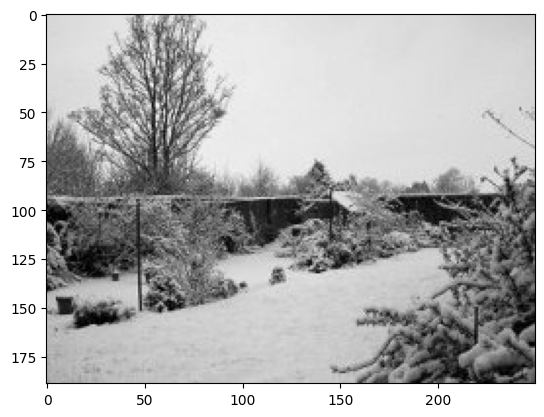

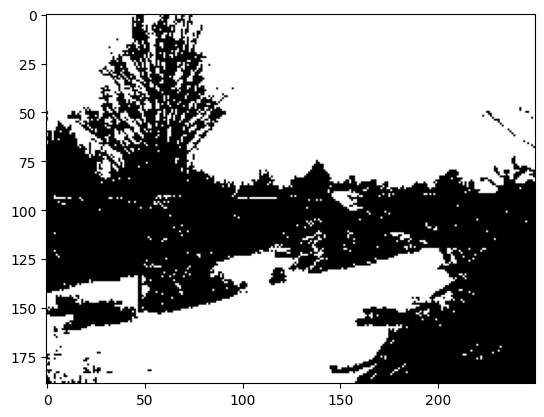

170

In [3]:
otsu_threshold('trees.jpg')